
---

# Viskoelastický spojitý nosník

---

Vypracoval: Daniel **BERÁNEK**

Předmět: **132PRPM** - Přetváření a porušování materiálů

---

**Koeficienty:**

a = 1.2

b = 1.4

c = 0.8

---

## Zadání

<img src="img/spojity-nosnik.png" style="margin:auto">
<p style="text-align:center">Obrázek 1: Statické schéma</p>

Spojitý nosník na obrázku je vyroben z betonu a má obdélníkový průřez o šířce $b = 0.4 \, \mathrm{m}$ a výšce $h = 0.6 \, \mathrm{m}$. Rozpětí jednotlivých polí je $L_{12}=(4+a) \, \mathrm{m}$ a $L_{23} = (3+b) \, \mathrm{m}$.

Předpokládejte, že se beton chová jako stárnoucí lineárně viskoelastický materiál, a zanedbejte veškeré další vlivy, např. smršťování, vznik trhlin v tažené oblasti nebo vliv výztuže. Ve stáří $32 \, \mathrm{dní}$ došlo k náhlému pokles střední podpory o $\bar{w}_2 = (a+c) \, \mathrm{mm}$ a ve stáří $70 \, \mathrm{dní}$ byl nosník zatížen osamělou silou $F = 100 c \, \mathrm{kN}$ uprostřed levého pole.

Vypočtěte a vykreslete průběh ohybových momentů v následujících okamžicích:

1. ve stáří 32 dnů, těsně po poklesu podpory,
2. ve stáří 70 dnů, těsně před zatížením silou $F$,
3. ve stáří 70 dnů, těsně po zatížení silou $F$,
4. ve stáří 365 dnů.

Pro všechny tyto okamžiky také vypočtěte pootočení $\varphi_2$ průřezu nad střední podporou a průhyb $w_c$ uprostřed levého pole. Funkci poddajnosti a relaxační funkci uvažujte podle **fib Model Code 2010**. Použitý beton byl vyroben z křemičitého kameniva a normálně tuhnoucího cementu a jeho průměrná tlaková pevnost měřená na válcích ve stáří $28 \, \mathrm{dní}$ byla $45 \, \mathrm{MPa}$. Nosník byl ošetřován prvních $12 \, \mathrm{dní}$ s ochranou proti vysoušení a poté vystaven prostředí o relativní vlhkosti $65%$. Jedním ze vstupních parametrů je také jmenovitá tloušťka $h$, kterou určíte jako dvojnásobek podílu mezi obsahem (plochou) a obvodem průřezu.

Na začátku kontroly budete dotázáni na hodnoty funkce poddajnosti $J(50, 15)$ a $R(50, 15)$, které slouží k ověření toho, zda jste zadali správně parametry modelu pro dotvarování, ale v samotném řešení úlohy se přímo neuplatní. Dále budete pro kontrolu potřebovat hodnoty pootočení $\varphi_2$, průhybu $w_c$ a momentové reakce ve vetknutí $R_M$ ve všech výše zmíněných okamžicích. Znaménka všech veličin uvažujte podle obvyklé konvence: kladné hodnoty momentové reakce a pootočení odpovídají smyslu otáčení proti hodinovým ručičkám, průhyb je kladný dolů. Pootočení budete zadávat v miliradiánech, průhyb v milimetrech a momentovou reakci v kNm.

Doporučujeme průběžné výpočty provádět se symboly a konkrétní hodnoty dosadit až do finálních výsledků, jinak hrozí, že bude postup nepřehledný a při opisování čísel vznikne chyba.

Konstrukci rozdělíme na 3 pruty. Protože na konstrukci působí pouze svislé zatížení, můžeme předpokládat, že veškeré vodorovné posuny jsou rovny 0. Ve vetknutí ve styčníku $1$ je zabráněno svislému posunu i pootočení, ve styčníku $c$ je svislé posunutí i pootočení neznámé, ve styčníku $1$ není bráněno natočení a svislý posun je předepsán funkcí $\hat{w}_2(t)$, ve styčníku $2$ je zabráněno svislému posunu, natočení není bráněno, ale pomocí uvážení nulového momentu v kloubovém styčníku (statická kondenzace) lze neznámou odpovídající natočení styčníku odkondenzovat.

Neznámé v této úloze jsou tedy svislý posun styčníku c ($w_c$), natočení styčníku c ($\varphi_c$) a natočení styčníku 2 ($\varphi_2$).

<img src="img/nezname.jpg" style="margin:auto; width: 1000px">
<p style="text-align:center">Obrázek 2: Posuny a pootočení, kódová čísla</p>

<img src="img/zatizeni.jpg" style="margin:auto; width: 1000px">
<p style="text-align:center">Obrázek 3: Předepsané zatížení, posuny styčníků</p>

<img src="img/koncove_momenty_sily.jpg" style="margin:auto; width: 1000px">
<p style="text-align:center">Obrázek 4: Koncové síly a momenty</p>

<img src="img/casova_osa.jpg" style="margin:auto; width: 1000px">
<p style="text-align:center">Obrázek 5: Časová osa</p>

In [1]:
# import knihoven
import sympy as smp
import matplotlib.pyplot as plt
import copy

In [2]:
# koeficienty
a = 1.2
b = 1.4
c = 0.8

In [3]:
# inicializace symbolických proměnných
w_1, w_c, w_2, w_3 = smp.symbols('w_1 w_c w_2 w_3')
w_bar = smp.symbols('wbar_2')
phi_1, phi_c, phi_2 = smp.symbols('varphi_1 varphi_c varphi_2')
L_12, L_23 = smp.symbols('L_12 L_23')
E, I = smp.symbols('E I')
F = smp.symbols('F')

***

## Sestavení matice tuhosti

### Matice tuhosti prutu $a$ (vetknutí-vetknutí):

In [4]:
k1 = 12*E*I / (L_12 / 2)**3
k2 = 6*E*I / (L_12 / 2)**2
k3 = 4*E*I / (L_12 / 2)
k4 = 2*E*I / (L_12 / 2)

K_a = smp.Matrix([
    [+k1, -k2, -k1, -k2],
    [-k2, +k3, +k2, +k4],
    [-k1, +k2, +k1, +k2],
    [-k2, +k4, +k2, +k3]
])

K_a

Matrix([
[ 96*E*I/L_12**3, -24*E*I/L_12**2, -96*E*I/L_12**3, -24*E*I/L_12**2],
[-24*E*I/L_12**2,      8*E*I/L_12,  24*E*I/L_12**2,      4*E*I/L_12],
[-96*E*I/L_12**3,  24*E*I/L_12**2,  96*E*I/L_12**3,  24*E*I/L_12**2],
[-24*E*I/L_12**2,      4*E*I/L_12,  24*E*I/L_12**2,      8*E*I/L_12]])

### Matice tuhosti prutu $b$ (vetknutí-vetknutí):

In [5]:
K_b = copy.copy(K_a)
K_b

Matrix([
[ 96*E*I/L_12**3, -24*E*I/L_12**2, -96*E*I/L_12**3, -24*E*I/L_12**2],
[-24*E*I/L_12**2,      8*E*I/L_12,  24*E*I/L_12**2,      4*E*I/L_12],
[-96*E*I/L_12**3,  24*E*I/L_12**2,  96*E*I/L_12**3,  24*E*I/L_12**2],
[-24*E*I/L_12**2,      4*E*I/L_12,  24*E*I/L_12**2,      8*E*I/L_12]])

### Matice tuhosti prutu $c$ (vetknutí-kloub):

In [6]:
k1 = 3*E*I / L_23**3
k2 = 3*E*I / L_23**2
k3 = 3*E*I / L_23

K_c = smp.Matrix([
    [+k1, -k2, -k1],
    [-k2, +k3, +k2],
    [-k1, +k2, +k1]
])

K_c

Matrix([
[ 3*E*I/L_23**3, -3*E*I/L_23**2, -3*E*I/L_23**3],
[-3*E*I/L_23**2,     3*E*I/L_23,  3*E*I/L_23**2],
[-3*E*I/L_23**3,  3*E*I/L_23**2,  3*E*I/L_23**3]])

### Globální matice tuhosti

Inicializace globální matice tuhosti

In [7]:
K_glob = smp.zeros(7, 7)
K_glob

Matrix([
[0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0]])

Lokalizace prvků matice tuhosti prutu $a$

In [8]:
K_glob[0:4, 0:4] += K_a
K_glob

Matrix([
[ 96*E*I/L_12**3, -24*E*I/L_12**2, -96*E*I/L_12**3, -24*E*I/L_12**2, 0, 0, 0],
[-24*E*I/L_12**2,      8*E*I/L_12,  24*E*I/L_12**2,      4*E*I/L_12, 0, 0, 0],
[-96*E*I/L_12**3,  24*E*I/L_12**2,  96*E*I/L_12**3,  24*E*I/L_12**2, 0, 0, 0],
[-24*E*I/L_12**2,      4*E*I/L_12,  24*E*I/L_12**2,      8*E*I/L_12, 0, 0, 0],
[              0,               0,               0,               0, 0, 0, 0],
[              0,               0,               0,               0, 0, 0, 0],
[              0,               0,               0,               0, 0, 0, 0]])

Lokalizace prvků matice tuhosti prutu $b$

In [9]:
K_glob[2:6, 2:6] += K_b
K_glob

Matrix([
[ 96*E*I/L_12**3, -24*E*I/L_12**2, -96*E*I/L_12**3, -24*E*I/L_12**2,               0,               0, 0],
[-24*E*I/L_12**2,      8*E*I/L_12,  24*E*I/L_12**2,      4*E*I/L_12,               0,               0, 0],
[-96*E*I/L_12**3,  24*E*I/L_12**2, 192*E*I/L_12**3,               0, -96*E*I/L_12**3, -24*E*I/L_12**2, 0],
[-24*E*I/L_12**2,      4*E*I/L_12,               0,     16*E*I/L_12,  24*E*I/L_12**2,      4*E*I/L_12, 0],
[              0,               0, -96*E*I/L_12**3,  24*E*I/L_12**2,  96*E*I/L_12**3,  24*E*I/L_12**2, 0],
[              0,               0, -24*E*I/L_12**2,      4*E*I/L_12,  24*E*I/L_12**2,      8*E*I/L_12, 0],
[              0,               0,               0,               0,               0,               0, 0]])

Lokalizace prvků matice tuhosti prutu $c$

In [10]:
K_glob[4:7, 4:7] += K_c
K_glob

Matrix([
[ 96*E*I/L_12**3, -24*E*I/L_12**2, -96*E*I/L_12**3, -24*E*I/L_12**2,                               0,                               0,              0],
[-24*E*I/L_12**2,      8*E*I/L_12,  24*E*I/L_12**2,      4*E*I/L_12,                               0,                               0,              0],
[-96*E*I/L_12**3,  24*E*I/L_12**2, 192*E*I/L_12**3,               0,                 -96*E*I/L_12**3,                 -24*E*I/L_12**2,              0],
[-24*E*I/L_12**2,      4*E*I/L_12,               0,     16*E*I/L_12,                  24*E*I/L_12**2,                      4*E*I/L_12,              0],
[              0,               0, -96*E*I/L_12**3,  24*E*I/L_12**2,  3*E*I/L_23**3 + 96*E*I/L_12**3, -3*E*I/L_23**2 + 24*E*I/L_12**2, -3*E*I/L_23**3],
[              0,               0, -24*E*I/L_12**2,      4*E*I/L_12, -3*E*I/L_23**2 + 24*E*I/L_12**2,         3*E*I/L_23 + 8*E*I/L_12,  3*E*I/L_23**2],
[              0,               0,               0,               0,           

## Vektor posunů a pootočení

In [11]:
u_glob = smp.Matrix([w_1, phi_1, w_c, phi_c, w_2, phi_2, w_3])
u_glob

Matrix([
[     w_1],
[varphi_1],
[     w_c],
[varphi_c],
[     w_2],
[varphi_2],
[     w_3]])

## Modifikovaná matice tuhosti

In [12]:
restrained_dof = [0, 1, 4, 6]  # odpovida kodovym cislum w_1, phi_1, w_2, w_3

K_mod = copy.copy(K_glob)

for i in restrained_dof:
    for j in range(len(K_mod[i, :])):
        if i == j:
            K_mod[i, j] = 1
        else:
            K_mod[i, j] = 0

K_mod

Matrix([
[              1,              0,               0,           0,                               0,                       0,             0],
[              0,              1,               0,           0,                               0,                       0,             0],
[-96*E*I/L_12**3, 24*E*I/L_12**2, 192*E*I/L_12**3,           0,                 -96*E*I/L_12**3,         -24*E*I/L_12**2,             0],
[-24*E*I/L_12**2,     4*E*I/L_12,               0, 16*E*I/L_12,                  24*E*I/L_12**2,              4*E*I/L_12,             0],
[              0,              0,               0,           0,                               1,                       0,             0],
[              0,              0, -24*E*I/L_12**2,  4*E*I/L_12, -3*E*I/L_23**2 + 24*E*I/L_12**2, 3*E*I/L_23 + 8*E*I/L_12, 3*E*I/L_23**2],
[              0,              0,               0,           0,                               0,                       0,             1]])

***

## Výpočet

### Po zatížení posunem podpory

- v čase $t = 32 \, \mathrm{dní}$

#### Vektor pravé strany

In [13]:
F_glob_0 = smp.Matrix([0, 0, 0, 0, 0, 0, 0])
F_glob_0

Matrix([
[0],
[0],
[0],
[0],
[0],
[0],
[0]])

#### Modifikovaný vektor pravé strany

In [14]:
F_mod_0 = copy.copy(F_glob_0)
F_mod_0[4] = w_bar
F_mod_0

Matrix([
[     0],
[     0],
[     0],
[     0],
[wbar_2],
[     0],
[     0]])

#### Výpočet vektoru posunů a pootočení

In [15]:
u_sol_0 = K_mod.solve(F_mod_0)
u_sol_0

Matrix([
[                                                                                                0],
[                                                                                                0],
[         (3*L_12**2*wbar_2 + 12*L_12*L_23*wbar_2 + 10*L_23**2*wbar_2)/(24*L_12*L_23 + 32*L_23**2)],
[(-3*L_12**2*wbar_2 - 18*L_12*L_23*wbar_2 - 18*L_23**2*wbar_2)/(12*L_12**2*L_23 + 16*L_12*L_23**2)],
[                                                                                           wbar_2],
[                          (3*L_12**2*wbar_2 - 6*L_23**2*wbar_2)/(3*L_12**2*L_23 + 4*L_12*L_23**2)],
[                                                                                                0]])

Vztah pro výpočet pootočení nad střední podporou $\varphi_2(t=32)$:

In [16]:
phi_2_0 = u_sol_0[5].simplify()
phi_2_0

3*wbar_2*(L_12**2 - 2*L_23**2)/(L_12*L_23*(3*L_12 + 4*L_23))

Po dosazení za $L_{12}, L_{23}$ a $\bar{w}_2$ dostaneme hodnotu v $\mathrm{mrad}$:

In [17]:
phi_2_0.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c)
])

-0.0922571404499115

Svislý posun v polovině rozpětí levého pole $w_c(t=32)$ lze vypočítat ze vztahu:

In [18]:
w_c_0 = u_sol_0[2].simplify()
w_c_0

wbar_2*(3*L_12**2 + 12*L_12*L_23 + 10*L_23**2)/(8*L_23*(3*L_12 + 4*L_23))

Po dosazení dostaneme hodnotu v $\mathrm{[mm]}$:

In [19]:
w_c_0.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c)
])

0.940032858707557

Vektor koncových sil a momentů na prutu $a$ lze vypočítat jako

In [20]:
koncove_sily_a_0 = K_a @ smp.Matrix(u_sol_0[0:4])
koncove_sily_a_0

Matrix([
[-24*E*I*(-3*L_12**2*wbar_2 - 18*L_12*L_23*wbar_2 - 18*L_23**2*wbar_2)/(L_12**2*(12*L_12**2*L_23 + 16*L_12*L_23**2)) - 96*E*I*(3*L_12**2*wbar_2 + 12*L_12*L_23*wbar_2 + 10*L_23**2*wbar_2)/(L_12**3*(24*L_12*L_23 + 32*L_23**2))],
[     4*E*I*(-3*L_12**2*wbar_2 - 18*L_12*L_23*wbar_2 - 18*L_23**2*wbar_2)/(L_12*(12*L_12**2*L_23 + 16*L_12*L_23**2)) + 24*E*I*(3*L_12**2*wbar_2 + 12*L_12*L_23*wbar_2 + 10*L_23**2*wbar_2)/(L_12**2*(24*L_12*L_23 + 32*L_23**2))],
[ 24*E*I*(-3*L_12**2*wbar_2 - 18*L_12*L_23*wbar_2 - 18*L_23**2*wbar_2)/(L_12**2*(12*L_12**2*L_23 + 16*L_12*L_23**2)) + 96*E*I*(3*L_12**2*wbar_2 + 12*L_12*L_23*wbar_2 + 10*L_23**2*wbar_2)/(L_12**3*(24*L_12*L_23 + 32*L_23**2))],
[     8*E*I*(-3*L_12**2*wbar_2 - 18*L_12*L_23*wbar_2 - 18*L_23**2*wbar_2)/(L_12*(12*L_12**2*L_23 + 16*L_12*L_23**2)) + 24*E*I*(3*L_12**2*wbar_2 + 12*L_12*L_23*wbar_2 + 10*L_23**2*wbar_2)/(L_12**2*(24*L_12*L_23 + 32*L_23**2))]])

Ohybový moment v levé podpoře $M_1(t=32)$, který odpovídá koncovému momentu $M_{1c}$ na prutu $a$, lze podle teorie pružnosti vypočítat ze vztahu:

In [21]:
M_1_0 = koncove_sily_a_0[1]
M_1_0.simplify()

6*E*I*wbar_2*(L_12**2 + 3*L_12*L_23 + 2*L_23**2)/(L_12**2*L_23*(3*L_12 + 4*L_23))

Podle teorie pružnosti je výsledek závislý na hodnotě modulu pružnosti $E$, ten lze pro případ viskoelasticity nahradit hodnotou relaxační funkce $R(t=32, t'=32) = 3.5783E+04 \, \mathrm{MPa}$

In [22]:
M_1_0_res = M_1_0.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
    (I, (1/12)*0.4*0.6**3),
    (E, 3.5783e+04)  # E -> R(32, 32)
])
M_1_0_res

105.194325229914

Ohybový moment ve styčníku $c$ odpovídá záporně vzatému koncovému momentu $M_{c1}$ na prutu $a$ lze vypočítat ze vztahu

In [23]:
M_c_0 = -koncove_sily_a_0[3]
M_c_0.simplify()

3*E*I*wbar_2*(-L_12**2 + 2*L_23**2)/(L_12**2*L_23*(3*L_12 + 4*L_23))

In [24]:
M_c_0_res = M_c_0.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
    (I, (1/12)*0.4*0.6**3),
    (E, 3.5783e+04)  # E -> R(32, 32)
])
M_c_0_res

4.57094389391887

Vektor koncových sil a momentů na prutu $c$ lze vypočítat jako

In [25]:
koncove_sily_c_0 = K_c @ smp.Matrix(u_sol_0[4:7])
koncove_sily_c_0

Matrix([
[-3*E*I*(3*L_12**2*wbar_2 - 6*L_23**2*wbar_2)/(L_23**2*(3*L_12**2*L_23 + 4*L_12*L_23**2)) + 3*E*I*wbar_2/L_23**3],
[    3*E*I*(3*L_12**2*wbar_2 - 6*L_23**2*wbar_2)/(L_23*(3*L_12**2*L_23 + 4*L_12*L_23**2)) - 3*E*I*wbar_2/L_23**2],
[ 3*E*I*(3*L_12**2*wbar_2 - 6*L_23**2*wbar_2)/(L_23**2*(3*L_12**2*L_23 + 4*L_12*L_23**2)) - 3*E*I*wbar_2/L_23**3]])

Ohybový moment ve styčníku $2$ odpovídá koncovému momentu $M_{23}$ na prutu $c$

In [26]:
M_2_0 = koncove_sily_c_0[1]
M_2_0.simplify()

6*E*I*wbar_2*(-2*L_12 - 3*L_23)/(L_12*L_23*(3*L_12 + 4*L_23))

In [27]:
M_2_0_res = M_2_0.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
    (I, (1/12)*0.4*0.6**3),
    (E, 3.5783e+04)  # E -> R(32, 32)
])
M_2_0_res

-96.0524374420760

***

### Před zatížením silou $F$ v čase $t = 70 \, \mathrm{dní}$

Protože se vektor zatížení, ani předepsané posuny nijak nezměnily, lze využít vztahy odvozené v předcházející sekci.

Vztah pro výpočet pootočení nad střední podporou $\varphi_2(t\rightarrow70^-)$:

In [28]:
phi_2_1 = copy.copy(phi_2_0)
phi_2_1

3*wbar_2*(L_12**2 - 2*L_23**2)/(L_12*L_23*(3*L_12 + 4*L_23))

Po dosazení za $L_{12}, L_{23}$ a $\bar{w}_2$ dostaneme hodnotu v $\mathrm{mrad}$:

In [29]:
phi_2_1.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
])

-0.0922571404499115

Svislý posun v polovině rozpětí levého pole $w_c(t=32)$ lze vypočítat ze vztahu:

In [30]:
w_c_1 = copy.copy(w_c_0)
w_c_1

wbar_2*(3*L_12**2 + 12*L_12*L_23 + 10*L_23**2)/(8*L_23*(3*L_12 + 4*L_23))

Po dosazení dostaneme hodnotu v $\mathrm{[mm]}$:

In [31]:
w_c_1.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c)
])

0.940032858707557

Vektor koncových sil a momentů na prutu $a$ lze vypočítat jako

Ohybový moment v levé podpoře $M_1(t \rightarrow 70^-)$, který odpovídá koncovému momentu $M_{1c}$ na prutu $a$, lze podle teorie pružnosti vypočítat ze vztahu:

In [32]:
M_1_1 = copy.copy(M_1_0)
M_1_1.simplify()

6*E*I*wbar_2*(L_12**2 + 3*L_12*L_23 + 2*L_23**2)/(L_12**2*L_23*(3*L_12 + 4*L_23))

Podle teorie pružnosti je výsledek závislý na hodnotě modulu pružnosti $E$, ten lze pro případ viskoelasticity nahradit hodnotou relaxační funkce $R(t=70, t'=32) = 2.0032E+04 \, \mathrm{MPa}$

In [33]:
M_1_1_res = M_1_1.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
    (I, (1/12)*0.4*0.6**3),
    (E, 2.0032e+04)  # E -> R(70, 32)
])
M_1_1_res

58.8897723222097

Ohybový moment ve styčníku $c$ odpovídá záporně vzatému koncovému momentu $M_{c1}$ na prutu $a$ lze vypočítat ze vztahu

In [34]:
M_c_1_res = M_c_0.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
    (I, (1/12)*0.4*0.6**3),
    (E, 2.0032e+04)  # E -> R(70, 32)
])
M_c_1_res

2.55890082114364

Vektor koncových sil a momentů na prutu $c$ lze vypočítat jako

Ohybový moment ve styčníku $2$ odpovídá koncovému momentu $M_{23}$ na prutu $c$

In [35]:
M_2_1_res = M_2_0.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
    (I, (1/12)*0.4*0.6**3),
    (E, 2.0032e+04)  # E -> R(70, 32)
])
M_2_1_res

-53.7719706799225

***

### Po zatížení silou $F$ v čase $t = 70 \, \mathrm{dní}$

Po zatížení silou $F$ dojde ke změně vektoru pravé strany.

In [36]:
F_glob_2 = smp.Matrix([0, 0, F, 0, 0, 0, 0])
F_glob_2

Matrix([
[0],
[0],
[F],
[0],
[0],
[0],
[0]])

#### Modifikovaný vektor pravé strany

In [37]:
F_mod_2 = copy.copy(F_glob_2)
F_mod_2[4] = w_bar
F_mod_2

Matrix([
[     0],
[     0],
[     F],
[     0],
[wbar_2],
[     0],
[     0]])

#### Výpočet vektoru posunů a pootočení

In [38]:
u_sol_2 = K_mod.solve(F_mod_2)
u_sol_2

Matrix([
[                                                                                                                                                         0],
[                                                                                                                                                         0],
[(72*E*I*L_12**2*wbar_2 + 288*E*I*L_12*L_23*wbar_2 + 240*E*I*L_23**2*wbar_2 + 3*F*L_12**4*L_23 + 7*F*L_12**3*L_23**2)/(576*E*I*L_12*L_23 + 768*E*I*L_23**2)],
[             (-24*E*I*L_12**2*wbar_2 - 144*E*I*L_12*L_23*wbar_2 - 144*E*I*L_23**2*wbar_2 - F*L_12**3*L_23**2)/(96*E*I*L_12**2*L_23 + 128*E*I*L_12*L_23**2)],
[                                                                                                                                                    wbar_2],
[                                           (24*E*I*L_12**2*wbar_2 - 48*E*I*L_23**2*wbar_2 + F*L_12**3*L_23**2)/(24*E*I*L_12**2*L_23 + 32*E*I*L_12*L_23**2)],
[                                          

Vztah pro výpočet pootočení nad střední podporou $\varphi_2(t\rightarrow 70^+)$:

In [39]:
phi_2_2 = u_sol_2[5].simplify()
smp.apart(phi_2_2, w_bar, F)

F*L_12**2*L_23/(24*E*I*L_12 + 32*E*I*L_23) + wbar_2*(3*L_12**2 - 6*L_23**2)/(3*L_12**2*L_23 + 4*L_12*L_23**2)

Z uvedeného vztahu lze vypozorovat, že příspěvěk k natočení způsobený silou $F$ je v pružném řešení nepřímo úměrný poddajnosti $1/E$, který lze pro případ viskoelasticity nahradit hodnotou funkce poddajnosti $J(t=70, t'=70) = 2.6907E-05 \, \mathrm{MPa^{-1}}$

In [40]:
phi_2_2.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
    (I, (1/12)*0.4*0.6**3),
    (E, 1/2.6907e-05),  # E -> 1 / J(70, 70)
    (F, 100*c),
])

0.0416655181846266

Svislý posun v polovině rozpětí levého pole $w_c(t=70)$ lze vypočítat ze vztahu:

In [41]:
w_c_2 = u_sol_2[2].simplify()
smp.apart(w_c_2, w_bar)

wbar_2*(3*L_12**2 + 12*L_12*L_23 + 10*L_23**2)/(24*L_12*L_23 + 32*L_23**2) + (3*F*L_12**4 + 7*F*L_12**3*L_23)/(576*E*I*L_12 + 768*E*I*L_23)

Poddajnost $1/E$ opět nahradíme hodnotou funkce poddajnosti $J(t=70, t'=70) = 2.6907E-05 \, \mathrm{MPa^{-1}}$

In [42]:
w_c_2.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
    (I, (1/12)*0.4*0.6**3),
    (E, 1/2.6907e-05),  # E -> 1 / J(70, 70)
    (F, 100*c),
])

1.24602584237556

Vektor koncových sil a momentů na prutu $a$ lze vypočítat jako

In [43]:
koncove_sily_a_2 = K_a @ smp.Matrix(u_sol_2[0:4])
koncove_sily_a_2

Matrix([
[-24*E*I*(-24*E*I*L_12**2*wbar_2 - 144*E*I*L_12*L_23*wbar_2 - 144*E*I*L_23**2*wbar_2 - F*L_12**3*L_23**2)/(L_12**2*(96*E*I*L_12**2*L_23 + 128*E*I*L_12*L_23**2)) - 96*E*I*(72*E*I*L_12**2*wbar_2 + 288*E*I*L_12*L_23*wbar_2 + 240*E*I*L_23**2*wbar_2 + 3*F*L_12**4*L_23 + 7*F*L_12**3*L_23**2)/(L_12**3*(576*E*I*L_12*L_23 + 768*E*I*L_23**2))],
[     4*E*I*(-24*E*I*L_12**2*wbar_2 - 144*E*I*L_12*L_23*wbar_2 - 144*E*I*L_23**2*wbar_2 - F*L_12**3*L_23**2)/(L_12*(96*E*I*L_12**2*L_23 + 128*E*I*L_12*L_23**2)) + 24*E*I*(72*E*I*L_12**2*wbar_2 + 288*E*I*L_12*L_23*wbar_2 + 240*E*I*L_23**2*wbar_2 + 3*F*L_12**4*L_23 + 7*F*L_12**3*L_23**2)/(L_12**2*(576*E*I*L_12*L_23 + 768*E*I*L_23**2))],
[ 24*E*I*(-24*E*I*L_12**2*wbar_2 - 144*E*I*L_12*L_23*wbar_2 - 144*E*I*L_23**2*wbar_2 - F*L_12**3*L_23**2)/(L_12**2*(96*E*I*L_12**2*L_23 + 128*E*I*L_12*L_23**2)) + 96*E*I*(72*E*I*L_12**2*wbar_2 + 288*E*I*L_12*L_23*wbar_2 + 240*E*I*L_23**2*wbar_2 + 3*F*L_12**4*L_23 + 7*F*L_12**3*L_23**2)/(L_12**3*(576*E*I*L_12*L_23 + 

Ohybový moment v levé podpoře $M_1(t\rightarrow70^+)$, který odpovídá koncovému momentu $M_{1c}$ na prutu $a$, lze podle teorie pružnosti vypočítat ze vztahu:

In [44]:
M_1_2 = koncove_sily_a_2[1]
smp.apart(M_1_2.simplify(), w_bar)

wbar_2*(6*E*I*L_12**2 + 18*E*I*L_12*L_23 + 12*E*I*L_23**2)/(3*L_12**3*L_23 + 4*L_12**2*L_23**2) + (3*F*L_12**2 + 6*F*L_12*L_23)/(24*L_12 + 32*L_23)

Opět si všimneme, že příspěvěk k momentu od vynuceného posunu podpory $\hat{w}_2$ je závislý na hodnotě modulu pružnosti $E$, který nahradíme hodnotou relaxační funkce $R(t=70, t'=32) = 2.0032E+04 \, \mathrm{MPa}$

In [45]:
M_1_2_res = M_1_2.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
    (I, (1/12)*0.4*0.6**3),
    (E, 2.0032e+04),  # E -> R(70, 32)
    (F, 100*c)
])
M_1_2_res

124.672904852330

Ohybový moment ve styčníku $c$ odpovídá záporně vzatému koncovému momentu $M_{c1}$ na prutu $a$ lze vypočítat ze vztahu

In [46]:
M_c_2 = -koncove_sily_a_2[3]
smp.apart(M_c_2.simplify(), w_bar)

-wbar_2*(3*E*I*L_12**2 - 6*E*I*L_23**2)/(3*L_12**3*L_23 + 4*L_12**2*L_23**2) - (3*F*L_12**2 + 5*F*L_12*L_23)/(24*L_12 + 32*L_23)

In [47]:
M_c_2_res = M_c_2.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
    (I, (1/12)*0.4*0.6**3),
    (E, 2.0032e+04),  # E -> R(70, 32)
    (F, 100*c)
])
M_c_2_res

-56.3326654439166

In [48]:
koncove_sily_c_2 = K_c @ smp.Matrix(u_sol_2[4:7])
koncove_sily_c_2

Matrix([
[-3*E*I*(24*E*I*L_12**2*wbar_2 - 48*E*I*L_23**2*wbar_2 + F*L_12**3*L_23**2)/(L_23**2*(24*E*I*L_12**2*L_23 + 32*E*I*L_12*L_23**2)) + 3*E*I*wbar_2/L_23**3],
[    3*E*I*(24*E*I*L_12**2*wbar_2 - 48*E*I*L_23**2*wbar_2 + F*L_12**3*L_23**2)/(L_23*(24*E*I*L_12**2*L_23 + 32*E*I*L_12*L_23**2)) - 3*E*I*wbar_2/L_23**2],
[ 3*E*I*(24*E*I*L_12**2*wbar_2 - 48*E*I*L_23**2*wbar_2 + F*L_12**3*L_23**2)/(L_23**2*(24*E*I*L_12**2*L_23 + 32*E*I*L_12*L_23**2)) - 3*E*I*wbar_2/L_23**3]])

Ohybový moment ve styčníku $2$ odpovídá koncovému momentu $M_{23}$ na prutu $c$

In [49]:
M_2_2 = koncove_sily_c_2[1]
smp.apart(M_2_2.simplify(), w_bar)

3*F*L_12**2/(24*L_12 + 32*L_23) - wbar_2*(12*E*I*L_12 + 18*E*I*L_23)/(3*L_12**2*L_23 + 4*L_12*L_23**2)

In [50]:
M_2_2_res = M_2_2.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
    (I, (1/12)*0.4*0.6**3),
    (E, 2.0032e+04),  # E -> R(70, 32)
    (F, 100*c)
])
M_2_2_res

-29.3382357401634

***

### V čase $t = 365 \, \mathrm{dní}$

Pro vypočítání hodnot v čase $t = 365 \, \mathrm{dní}$ lze opět využít vztahy odvozené v předcházející sekci, protože se vektor zatížení ani předepsané posuny nijak nezměnily.

Vztah pro výpočet pootočení nad střední podporou $\varphi_2(t=365)$:

In [51]:
phi_2_3 = copy.copy(phi_2_2)
smp.apart(phi_2_3, w_bar)

F*L_12**2*L_23/(24*E*I*L_12 + 32*E*I*L_23) + wbar_2*(3*L_12**2 - 6*L_23**2)/(3*L_12**2*L_23 + 4*L_12*L_23**2)

Z uvedeného vztahu lze vypozorovat, že příspěvěk k natočení způsobený silou $F$ je v pružném řešení nepřímo úměrný poddajnosti $1/E$, který lze pro případ viskoelasticity nahradit hodnotou funkce poddajnosti $J(t=365, t'=70) = 5.0320E-05 \, \mathrm{MPa^{-1}}$

In [52]:
phi_2_3.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
    (I, (1/12)*0.4*0.6**3),
    (E, 1/5.0320e-05),  # E -> 1 / J(365, 70)
    (F, 100*c),
])

0.158197692214078

Svislý posun v polovině rozpětí levého pole $w_c(t=365)$ lze vypočítat ze vztahu:

In [53]:
w_c_3 = copy.copy(w_c_2)
smp.apart(w_c_3, w_bar)

wbar_2*(3*L_12**2 + 12*L_12*L_23 + 10*L_23**2)/(24*L_12*L_23 + 32*L_23**2) + (3*F*L_12**4 + 7*F*L_12**3*L_23)/(576*E*I*L_12 + 768*E*I*L_23)

Poddajnost $1/E$ opět nahradíme hodnotou funkce poddajnosti $J(t=365, t'=70) = 5.0320E-05 \, \mathrm{MPa^{-1}}$

In [54]:
w_c_3.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
    (I, (1/12)*0.4*0.6**3),
    (E, 1/5.0320e-05),  # E -> 1 / J(365, 70)
    (F, 100*c),
])

1.51228420364285

Ohybový moment v levé podpoře $M_1(t=365)$, který odpovídá koncovému momentu $M_{1c}$ na prutu $a$, lze podle teorie pružnosti vypočítat ze vztahu:

In [55]:
M_1_3 = copy.copy(M_1_2)
smp.apart(M_1_3.simplify(), w_bar)

wbar_2*(6*E*I*L_12**2 + 18*E*I*L_12*L_23 + 12*E*I*L_23**2)/(3*L_12**3*L_23 + 4*L_12**2*L_23**2) + (3*F*L_12**2 + 6*F*L_12*L_23)/(24*L_12 + 32*L_23)

Modul pružnosti $E$ nahradíme hodnotou relaxační funkce $R(t=365, t'=32) = 1.4004E+04 \, \mathrm{MPa}$

In [56]:
M_1_3_res = M_1_3.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
    (I, (1/12)*0.4*0.6**3),
    (E, 1.4004e+04),  # E -> R(365, 32)
    (F, 100*c)
])
M_1_3_res

106.951881112400

Ohybový moment ve styčníku $c$ odpovídá záporně vzatému koncovému momentu $M_{c1}$ na prutu $a$ lze vypočítat ze vztahu

In [57]:
M_c_3 = copy.copy(M_c_2)
smp.apart(M_c_3.simplify(), w_bar)

-wbar_2*(3*E*I*L_12**2 - 6*E*I*L_23**2)/(3*L_12**3*L_23 + 4*L_12**2*L_23**2) - (3*F*L_12**2 + 5*F*L_12*L_23)/(24*L_12 + 32*L_23)

In [58]:
M_c_3_res = M_c_3.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
    (I, (1/12)*0.4*0.6**3),
    (E, 1.4004e+04),  # E -> R(365, 32)
    (F, 100*c)
])
M_c_3_res

-57.1026861183302

Ohybový moment ve styčníku $2$ odpovídá koncovému momentu $M_{23}$ na prutu $c$

In [59]:
M_2_3 = copy.copy(M_2_2)
smp.apart(M_2_3.simplify(), w_bar)

3*F*L_12**2/(24*L_12 + 32*L_23) - wbar_2*(12*E*I*L_12 + 18*E*I*L_23)/(3*L_12**2*L_23 + 4*L_12*L_23**2)

In [60]:
M_2_3_res = M_2_3.subs([
    (L_12, 4+a),
    (L_23, 3+b),
    (w_bar, a+c),
    (I, (1/12)*0.4*0.6**3),
    (E, 1.4004e+04),  # E -> R(365, 32)
    (F, 100*c)
])
M_2_3_res

-13.1572533490606

## Vykreslení průběhu ohybových momentů

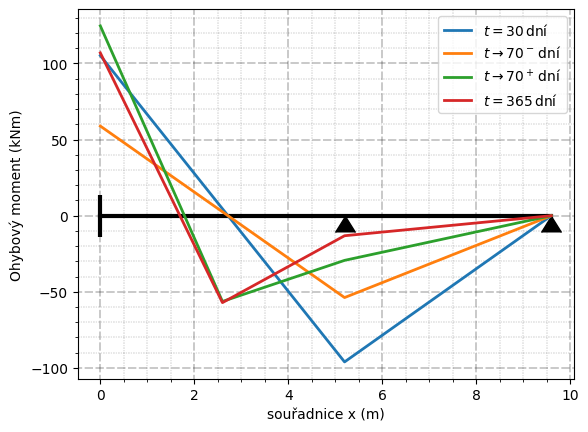

In [61]:
x = [0, (4+a)/2, 4+a, 4+a+3+b]
momenty_0 = [M_1_0_res, M_c_0_res, M_2_0_res, 0]
momenty_1 = [M_1_1_res, M_c_1_res, M_2_1_res, 0]
momenty_2 = [M_1_2_res, M_c_2_res, M_2_2_res, 0]
momenty_3 = [M_1_3_res, M_c_3_res, M_2_3_res, 0]


plt.plot([0, x[-1]], [0, 0], lw=3, c='k')  # nosnik
plt.plot(0, 0, marker='|', ms=30, c='k', mew=3)  # vetknuti
plt.plot([4+a, 4+a+3+b], [0, 0], marker=6, ms=15, c='k')  # klouby

plt.plot(x, momenty_0, lw=2, label=r'$t = 30 \, \mathrm{dní}$')
plt.plot(x, momenty_1, lw=2, label=r'$t \rightarrow 70^- \, \mathrm{dní}$')
plt.plot(x, momenty_2, lw=2, label=r'$t \rightarrow 70^+ \, \mathrm{dní}$')
plt.plot(x, momenty_3, lw=2, label=r'$t = 365 \, \mathrm{dní}$')

plt.grid(which="major", linestyle=(10, (20, 6)), color='black', lw=0.3)
plt.minorticks_on()
plt.grid(which="minor", linestyle=(0, (1, 3)), color='black', lw=0.3)
plt.legend()

plt.xlabel('souřadnice x (m)')
plt.ylabel('Ohybový moment (kNm)')

plt.show()